# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



In [1]:
import os
import sys
import random
from random import randint, randrange

import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from skimage.color import rgb2gray
from skimage import exposure

import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

---
## Step 0: Load The Data

There are tables which contain 'classid' and 'SignName' for traffic sign data in 'signnames.csv' file

In [2]:
sign_names = pd.read_csv('signnames.csv')

In [3]:
sign_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


I'm going to make look up table for traffic sign

In [4]:
sign_table = {}

for cid, sname in zip(sign_names['ClassId'], sign_names['SignName']):
    sign_table[cid] = sname

In [5]:
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Make validation data from 'train', about 20%
x_train, x_valid, y_train, y_valid = train_test_split(train['features'], train['labels'], test_size=0.2)
x_test, y_test = test['features'], test['labels']


The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

---

## Step 1: Check Data

In [6]:
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

sign = sign_names.values[:, 1]
col_width = max(len(name) for name in sign)
CLASS_NUM = len(sign_table)
print("We should classify images to {0} classes".format(CLASS_NUM))

We should classify images to 43 classes


In [7]:
print("train data: {0} samples".format(len(x_train)))
print("valid data: {0} samples".format(len(x_valid)))
print("test data: {0} samples".format(len(x_test)))
print("Image data shape ={}\n\n".format(x_train.shape[1:]))

TOTAL_SIZE = len(x_train) + len(x_valid) + len(x_test)

print("train data: {} %%".format(len(x_train)/TOTAL_SIZE))
print("valid data: {} %%".format(len(x_valid)/TOTAL_SIZE))
print("test data: {} %%".format(len(x_test)/TOTAL_SIZE))

train data: 27839 samples
valid data: 6960 samples
test data: 12630 samples
Image data shape =(32, 32, 3)


train data: 0.5869615636003289 %%
valid data: 0.14674566193678973 %%
test data: 0.26629277446288135 %%


In [8]:
print("Task of this project is classify {0} traffic sign images to {1} classes".format(TOTAL_SIZE, CLASS_NUM))

Task of this project is classify 47429 traffic sign images to 43 classes


### Visualize Data


 Text is not enough, Let's look real image not a number. Le't plot 4 traffic sign samples from train data

In [9]:
def plot_images(images, labels):
    fig, axes = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=1, wspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])
        
        # Class name
        sign_name = sign_table[labels[i]]
        
        ax.set_xlabel(sign_name)
    
    plt.show()

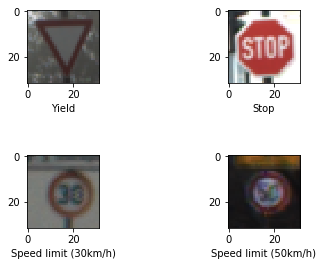

In [10]:
plot_images(x_train[:4], y_train[:4])

### Let's check how signs look like each class


Class 0: Speed limit (20km/h)                                148 samples


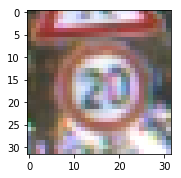

Class 1: Speed limit (30km/h)                                1571 samples


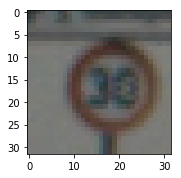

Class 2: Speed limit (50km/h)                                1614 samples


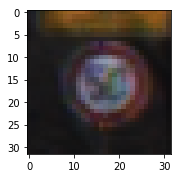

Class 3: Speed limit (60km/h)                                982 samples


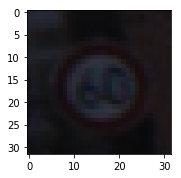

Class 4: Speed limit (70km/h)                                1417 samples


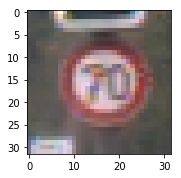

Class 5: Speed limit (80km/h)                                1342 samples


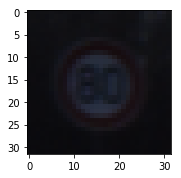

Class 6: End of speed limit (80km/h)                         293 samples


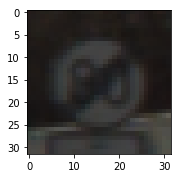

Class 7: Speed limit (100km/h)                               1036 samples


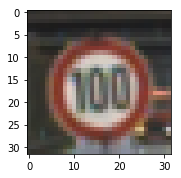

Class 8: Speed limit (120km/h)                               1021 samples


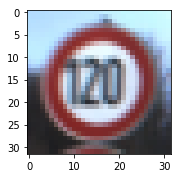

Class 9: No passing                                          1036 samples


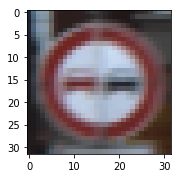

Class 10: No passing for vehicles over 3.5 metric tons        1458 samples


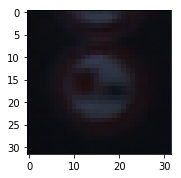

Class 11: Right-of-way at the next intersection               936 samples


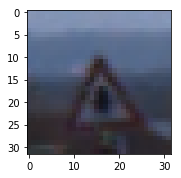

Class 12: Priority road                                       1523 samples


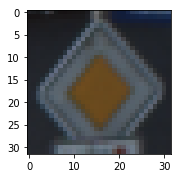

Class 13: Yield                                               1527 samples


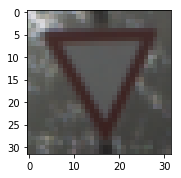

Class 14: Stop                                                532 samples


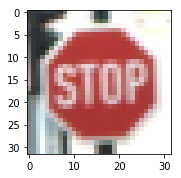

Class 15: No vehicles                                         432 samples


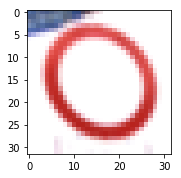

Class 16: Vehicles over 3.5 metric tons prohibited            266 samples


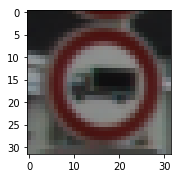

Class 17: No entry                                            803 samples


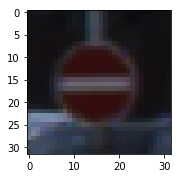

Class 18: General caution                                     887 samples


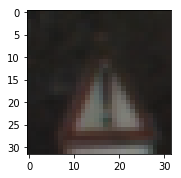

Class 19: Dangerous curve to the left                         137 samples


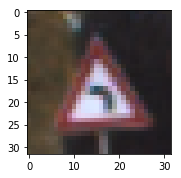

Class 20: Dangerous curve to the right                        241 samples


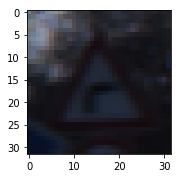

Class 21: Double curve                                        208 samples


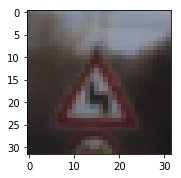

Class 22: Bumpy road                                          254 samples


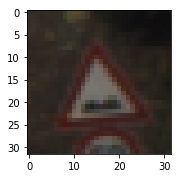

Class 23: Slippery road                                       358 samples


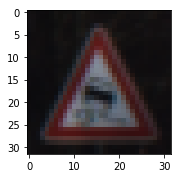

Class 24: Road narrows on the right                           184 samples


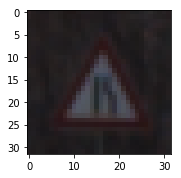

Class 25: Road work                                           1082 samples


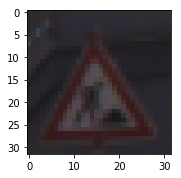

Class 26: Traffic signals                                     435 samples


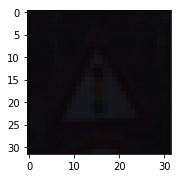

Class 27: Pedestrians                                         172 samples


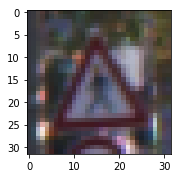

Class 28: Children crossing                                   390 samples


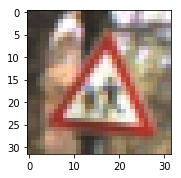

Class 29: Bicycles crossing                                   193 samples


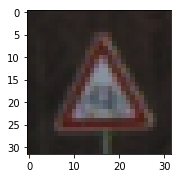

Class 30: Beware of ice/snow                                  321 samples


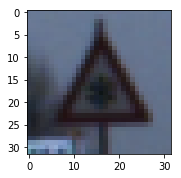

Class 31: Wild animals crossing                               561 samples


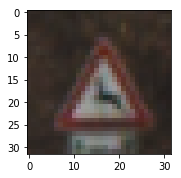

Class 32: End of all speed and passing limits                 160 samples


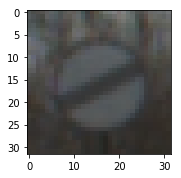

Class 33: Turn right ahead                                    463 samples


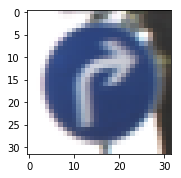

Class 34: Turn left ahead                                     287 samples


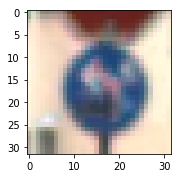

Class 35: Ahead only                                          866 samples


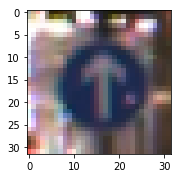

Class 36: Go straight or right                                257 samples


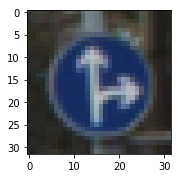

Class 37: Go straight or left                                 144 samples


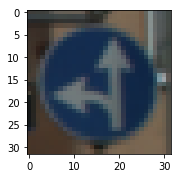

Class 38: Keep right                                          1509 samples


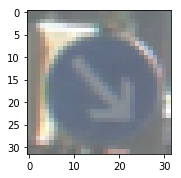

Class 39: Keep left                                           218 samples


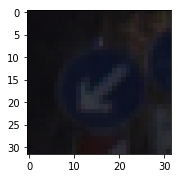

Class 40: Roundabout mandatory                                237 samples


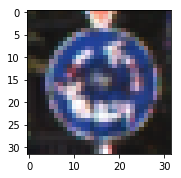

Class 41: End of no passing                                   170 samples


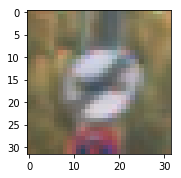

Class 42: End of no passing by vehicles over 3.5 metric tons  168 samples


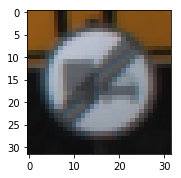

In [11]:
for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, sign[c], str(c_count)))
    fig = plt.figure(figsize = (2, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    axis = fig.add_subplot(1, 1, 1)
    axis.imshow(x_train[c_index])
        
    plt.show()



In [ ]:
plt.bar(np.arange(43), class_counts, align='center')
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

---

## Design and Test a Model Architecture

### Pre-process the Data Set

3-channels color is not neccesary to get high accuracy as [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) address. So, I preprocess images with grayscale and normalization through tensorflow method. To get more clear gray-scale images, I also apply 'Histogram equalization' technique. Histogram equalization is a technique for adjusting images intensities to enhance contrast.

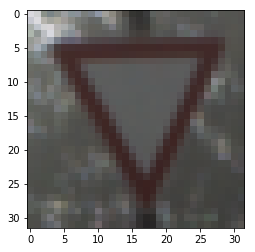

In [12]:
plt.imshow(x_train[0])

In [13]:
def preprocess_image(images):
    # gray scale
    gray_scaled = rgb2gray(images)
    # normalize
    normalized = (gray_scaled/255).astype(np.float32)
    sample_size = len(gray_scaled)
    
    # Histogram equalization
    for i in range(sample_size):
        #sys.stdout.write('\r'+str(i*100/sample_size))
        #sys.stdout.flush()
        normalized[i] = exposure.equalize_adapthist(normalized[i]).astype(np.float32)
        
     
    return normalized.reshape(normalized.shape + (1,))

In [14]:
preprocessed_x_train = preprocess_image(x_train)

/home/carnd/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [15]:
preprocessed_x_valid = preprocess_image(x_valid)

/home/carnd/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [16]:
preprocessed_x_test = preprocess_image(x_test)

/home/carnd/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


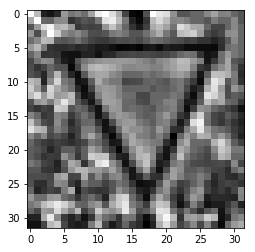

In [17]:
plt.imshow(preprocessed_x_train[0].reshape(32,32), cmap='gray')

### Model Architecture

In [18]:
def leaky_relu(tensor, name=None):
    return tf.maximum(0.01*tensor, tensor, name=name)

def leaky_relu_with_pooling(tensor, use_pooling, name=None):
    if use_pooling:
        tensor = tf.nn.max_pool(value=tensor,
                                ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1],
                                padding="SAME",
                                name=name+"pooling")
    
    return tf.maximum(0.01*tensor, tensor, name=name)

def flatten_layer(tensor):
    shape = tensor.get_shape().as_list()
    return tf.reshape(tensor, [-1, shape[1]*shape[2]*shape[3]])


def pooling(tensor, size):
    
    return tf.nn.max_pool(value=tensor,
                         ksize=[1, size, size, 1],
                         strides=[1, size, size, 1],
                         padding="SAME")

In [19]:
def conv_leaky_relu(tensor, filter_size, depth, strides, use_pooling, padding, name):
    weights = tf.get_variable(name+"weights",
                             shape=[filter_size, filter_size, tensor.get_shape()[3], depth],
                             initializer = tf.contrib.layers.variance_scaling_initializer())
    biases = tf.get_variable(name+"biases",
                            shape=[depth],
                            initializer = tf.constant_initializer(0.0))
    
    conv = tf.nn.conv2d(tensor, weights,
                       strides=[1, strides, strides, 1],
                       padding=padding)
        
    return leaky_relu_with_pooling(conv + biases, use_pooling, name=name+"leaky_relu")

In [20]:
from tensorflow.contrib.layers import fully_connected, dropout
from tensorflow.contrib.framework import arg_scope

tf.reset_default_graph() # reset graph

input_data = tf.placeholder(tf.float32, shape=[None, 32, 32, 1], name="input_data")
data_label = tf.placeholder(tf.int32, shape=[None], name="data_label")
train_mode = tf.placeholder(tf.bool, name='train_mode')


learning_rate = 0.001
keep_prob = 0.5
EPOCHS = 15
BATCH_SIZE = 256



#channel_selection = conv_leaky_relu(input_data, filter_size=1, use_pooling=False,
#                                   depth=1, strides=1, padding="SAME", name="channel_selection")

#----------<<Convolution Block>>----------#
conv1 = conv_leaky_relu(input_data, filter_size=3, use_pooling=False,
                        depth=32, strides=1, padding="SAME", name="conv1")


conv2 = conv_leaky_relu(conv1, filter_size=3, use_pooling=True,
                        depth=32, strides=1, padding="SAME", name="conv2")

#connect point 1
conv2_drop = dropout(conv2, keep_prob, is_training=train_mode)


conv3 = conv_leaky_relu(conv2_drop, filter_size=3, use_pooling=False,
                      depth=64, strides=1, padding="SAME", name="conv3")


conv4 = conv_leaky_relu(conv3, filter_size=3, use_pooling=True,
                        depth=64, strides=1, padding="SAME", name="conv4")

#connect point 2
conv4_drop = dropout(conv4, keep_prob, is_training=train_mode)


conv5 = conv_leaky_relu(conv4_drop, filter_size=3, use_pooling=False,
                      depth=128, strides=1, padding="SAME", name="conv5")

conv6 = conv_leaky_relu(conv5, filter_size=3, use_pooling=True,
                        depth=128, strides=1, padding="SAME", name="conv6")

conv6_drop = dropout(conv6, keep_prob, is_training=train_mode)

#-----------------------------------------#


#----------<<concate layers>>----------#
connect_point1 = flatten_layer(pooling(conv2_drop, 4)) # shape=(?, 512)
connect_point2 = flatten_layer(pooling(conv4_drop, 2)) # shape=(?, 1024)
connect_point3 = flatten_layer(conv6_drop)             # shape=(?, 2048)

flattened = tf.concat([connect_point1, connect_point2, connect_point3], 1) # shape=(?, 3584)
#-----------------------------------------#

he_init = tf.contrib.layers.variance_scaling_initializer()

# We can build short code using 'arg_scope' to avoid duplicate code

with arg_scope([fully_connected],
               activation_fn=leaky_relu,
               weights_initializer=he_init,
               ):
    fc_layer1 = fully_connected(flattened, 1024, scope="h1")
    fc_layer1_drop = dropout(fc_layer1, keep_prob, is_training=train_mode)
    logits = fully_connected(fc_layer1_drop, CLASS_NUM, activation_fn=None, scope="h2")



predictions = tf.nn.softmax(logits)

#one_hot encoding
one_hot = tf.contrib.layers.one_hot_encoding(labels=data_label,
                                             num_classes=CLASS_NUM,
                                             on_value=1.0,
                                             off_value=0.0,
                                             scope='one_hot')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=one_hot)


cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



In [21]:
num_train_examples = len(preprocessed_x_train)
num_valid_examples = len(preprocessed_x_valid)
num_test_examples = len(preprocessed_x_test)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer()) 
    
    
    print("Training...")
    
    batch_step = 0
    
    for i in range(EPOCHS):
        
        train_data, train_label = shuffle(preprocessed_x_train, y_train)
        
        for offset in range(0, num_train_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_step +=1
            
            #print(">>>", batch_step)
            
            batch_x, batch_y = train_data[offset:end], train_label[offset:end]
            feed_dict_train = {input_data: batch_x, data_label: batch_y,
                               train_mode: True}
            
            sess.run(optimizer, feed_dict=feed_dict_train)
        
        # After each EPOCH, check accuracy
        total_accuracy = 0
        
        for offset in range(0, num_valid_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_valid_x, batch_valid_y = preprocessed_x_valid[offset:end], y_valid[offset:end]
            
            feed_dict_valid = {input_data: batch_valid_x, data_label: batch_valid_y,
                               train_mode: False}
            
            score = sess.run(accuracy, feed_dict=feed_dict_valid)
            total_accuracy +=(score*len(batch_valid_x))
            #print("total_accuracy>>>>> ", total_accuracy)
        
        validation_accuracy = (total_accuracy/ num_valid_examples)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic-sign')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.402

EPOCH 2 ...
Validation Accuracy = 0.826

EPOCH 3 ...
Validation Accuracy = 0.931

EPOCH 4 ...
Validation Accuracy = 0.966

EPOCH 5 ...
Validation Accuracy = 0.979

EPOCH 6 ...
Validation Accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.988

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.992

EPOCH 10 ...
Validation Accuracy = 0.990

EPOCH 11 ...
Validation Accuracy = 0.994

EPOCH 12 ...
Validation Accuracy = 0.992

EPOCH 13 ...
Validation Accuracy = 0.995

EPOCH 14 ...
Validation Accuracy = 0.995

EPOCH 15 ...
Validation Accuracy = 0.995

Model saved


###  Test the Model

In [23]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('traffic-sign.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    total_accuracy = 0
    for offset in range(0, num_test_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_test_x, batch_test_y = preprocessed_x_test[offset:end], y_test[offset:end]
        feed_dict_test = {input_data: batch_test_x, data_label: batch_test_y,
                          train_mode: False}
        
        score = sess.run(accuracy, feed_dict = feed_dict_test)
        total_accuracy +=(score*len(batch_test_x))
    
    test_accuracy = (total_accuracy/ num_test_examples)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

Test Accuracy = 0.960



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")